# Happywhale Dataset Exploration

This notebook includes the code for the exploration of the dataset.
The data can be found here: https://www.kaggle.com/datasets/engdan/happywhale-images-256-by-256

In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
train_ids = pd.read_csv('train.csv')

In [25]:
from os import walk

# folder path
dir_path = 'resized_train_images'

# list to store files name
im_list = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    im_list.extend(file_names)
# print(res)

In [30]:
# Create dataframe of images with species and individual IDs
train_dir = 'resized_train_images/'
# im_list = os.listdir(train_dir)
train_df = pd.DataFrame(im_list, columns=['image_id'])
train_df['image'] = train_df['image_id']
train_df = train_df.merge(train_ids, on='image', how='left')
# train_df["image_path"] = train_df["image"].apply(lambda x: train_dir + "/" + x +)

In [87]:
train_df.head()

In [60]:
spec_df = train_df.groupby('species').count().sort_values(['image'], ascending=False).reset_index()

<Axes: title={'center': 'Count of images by Species'}, xlabel='species'>

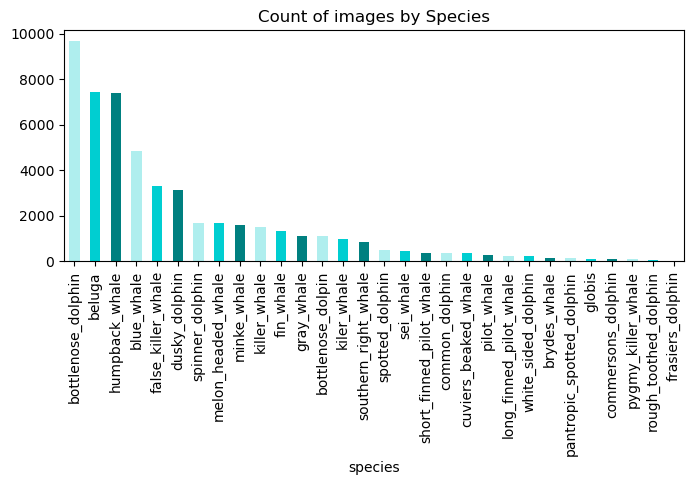

In [86]:
spec_df.plot(y='image',
             x='species',
             kind='bar', 
             legend=False, 
             color=['paleturquoise', 'darkturquoise', 'teal'],
             # colormap='tab10',
             title = 'Count of images by Species',
            figsize = (8,3))

In [53]:
agg_df = train_df.groupby('individual_id').count().sort_values(['image'], ascending=False).reset_index()

In [54]:
agg_df['image_count_bucket'] = np.where(agg_df.image > 100, '101+', 
                            np.where(agg_df.image > 50, '51-100',
                                     np.where(agg_df.image > 10, '11-50',
                                              np.where(agg_df.image > 1, '2-10', '1'))))

(array([  27.,    0.,   83.,    0.,    0.,  685.,    0., 5534.,    0.,
        9258.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

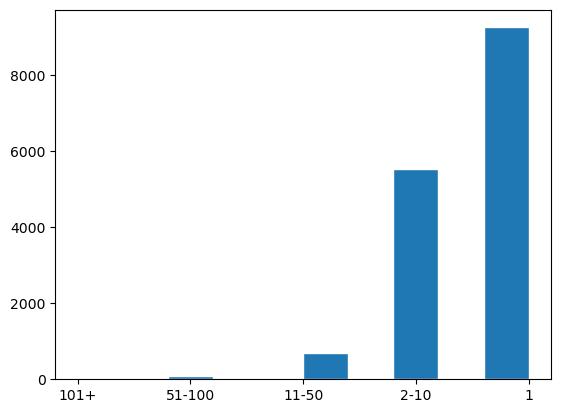

In [55]:
plt.hist(agg_df['image_count_bucket'], edgecolor='white')

In [58]:
agg_df.groupby('image_count_bucket').count().sort_values(['image']).reset_index()

,image_count_bucket,individual_id,image_id,image,species
0,101+,27,27,27,27
1,51-100,83,83,83,83
2,11-50,685,685,685,685
3,2-10,5534,5534,5534,5534
4,1,9258,9258,9258,9258


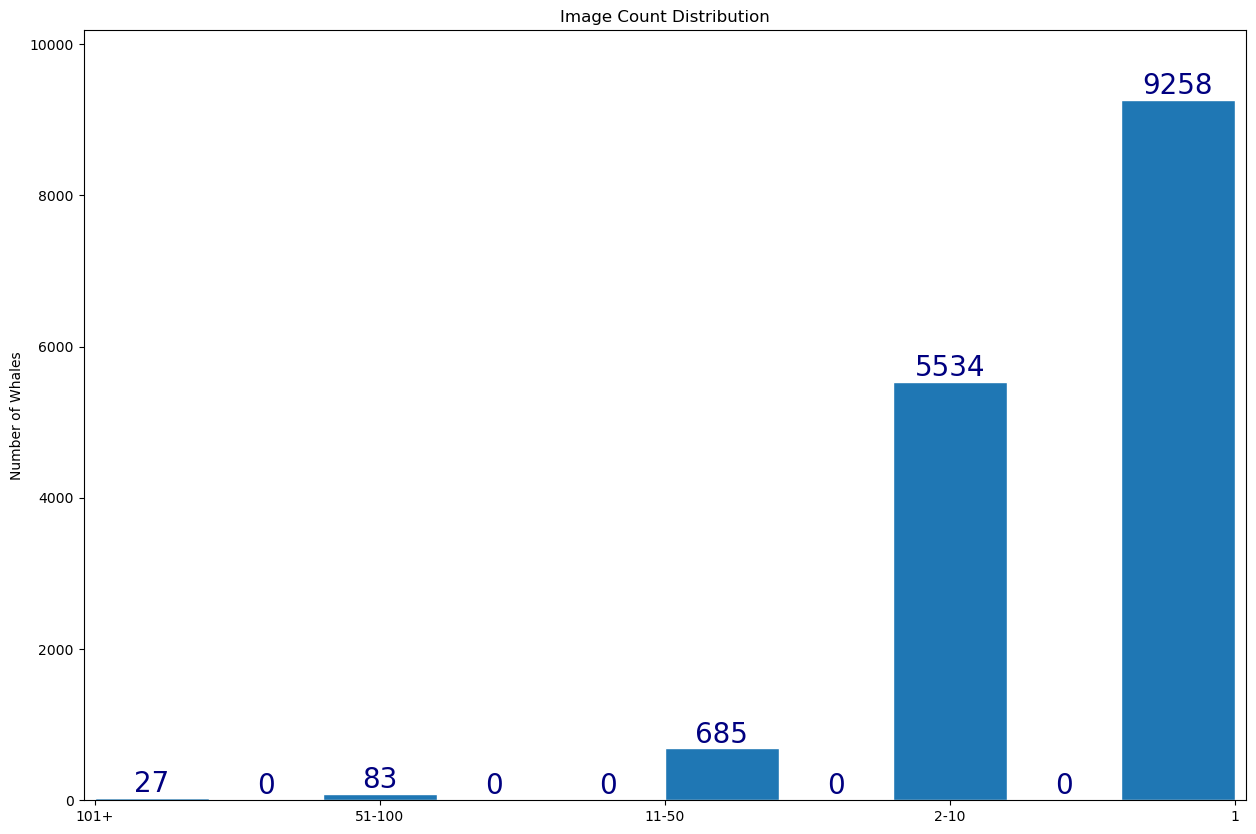

In [57]:

plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(agg_df['image_count_bucket'], edgecolor='white')
# plt.xlabel("Image Count Bucket")
plt.ylabel("Number of Whales")
plt.title('Image Count Distribution')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

In [48]:
# values

array([  27.,    0.,   83.,    0.,    0.,  685.,    0., 5534.,    0.,
       9258.])

In [88]:
# im_list